## Intro
In this lab scenario you are going to finish the implementation of [Vision Transformer](https://arxiv.org/abs/2010.11929) and train it on [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html).
Briefly ViT can be summarized as follows:
* Take the input image and divide it into patches of predefined size
* Project the patches to vectors and add learnable positional encodings
* Add a learnable classification "patch"
* Process the patches with the transformer


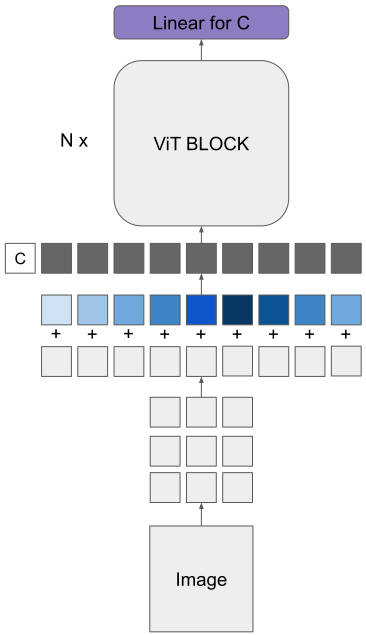

## Imports and packages

In [ ]:
!pip install lightning

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
from typing import Tuple
import lightning.pytorch as pl
import numpy as np

## Dataset preparation

In [ ]:
IMAGE_HEIGHT = 72
IMAGE_WIDTH = 72
input_transforms = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize(
            (IMAGE_HEIGHT, IMAGE_WIDTH),
            interpolation=torchvision.transforms.InterpolationMode.BILINEAR,
        ),
        torchvision.transforms.ToTensor(),  # our input is an image
        torchvision.transforms.Normalize(0.5, 0.25),
    ]
)

BATCH_SIZE = 32
NUM_CLASSES = 10

DOWNLOAD_PATH = "~/torch_datasets/cifar10"
DATASET_TRAIN = torchvision.datasets.CIFAR10(
    root=DOWNLOAD_PATH, train=True, transform=input_transforms, download=True,
)
DATASET_TEST = torchvision.datasets.CIFAR10(
    root=DOWNLOAD_PATH, train=False, transform=input_transforms, download=True
)

TRAIN_LOADER = torch.utils.data.DataLoader(
    DATASET_TRAIN, batch_size=BATCH_SIZE, shuffle=True
)
TEST_LOADER = torch.utils.data.DataLoader(
    DATASET_TEST, batch_size=BATCH_SIZE, shuffle=False
)

In [ ]:
def denormalize(imgs):
    return imgs * 0.25 + 0.5


def show_images(images, num_rows=1):
    """
    Given a tensor of shape [BATCH, C, H, W]
    prints BATCH images splitting them evenly among num_rows
    """
    assert len(images.shape) == 4
    num_images = images.shape[0]
    row_len = num_images // num_rows
    assert row_len * num_rows == num_images
    _, axes = plt.subplots(num_rows, row_len, figsize=(12, 12))
    images = images.permute(0, 2, 3, 1).detach().numpy()

    def handle_img(img, axe):
        axe.axis("off")
        img = np.clip(denormalize(img), 0, 1)

        axe.imshow(img)

    if num_images == 1:
        handle_img(images[0], axes)
    else:
        for i, img in enumerate(images):
            if num_rows == 1:
                handle_img(img, axes[i])
            else:
                r = i // row_len
                c = i % row_len
                handle_img(img, axes[r, c])

In [ ]:
SAMPLE_IMGS, _ = next(iter(TRAIN_LOADER))
show_images(SAMPLE_IMGS, 8)

## ViT
Finish the implementation of ViTPatchEmbedder according to docstrings.

In [ ]:
PATCH_SIZE = 4  # we will divide image into squares of size 4x4


class ViTPatchEmbedder(torch.nn.Module):
    """
    Given a batch of images each of shape input_shape = (C, H, W)
    splits each of them into non-overlapping patches of size (C, patch_size, patch_size).
    Then it projects each patch creating a vector of length d_model
    and adds a learnable positional encoding (different vector for each patch obtained from the image).
    """

    def __init__(
        self, input_shape: Tuple[int, int, int], patch_size: int, d_model: int
    ):
        super().__init__()
        assert len(input_shape) == 3
        self.input_shape = input_shape
        self.patch_size = patch_size
        assert input_shape[1] % patch_size == 0
        assert input_shape[2] % patch_size == 0

        # TODO { # projection layer and learnable positional encoding

        # }

    def forward(self, x):
        """
        Given a batch of images x,
        returns
            projected patches with
            positional encoding added
            and patches before projection
        """
        assert x.shape[-3:] == self.input_shape
        assert len(x.shape) == 4  # B, C, H, W
        # TODO { split images into patches

        # }

        pre_projection_patches = x.detach()
        assert (
            len(pre_projection_patches.shape) == 5
        )  # [BATCH, NUM_PATCHES, C, patch_size, patch_size]
        assert pre_projection_patches.shape[3] == self.patch_size
        assert pre_projection_patches.shape[4] == self.patch_size

        # TODO { Project patches and add learnable positional encoding

        # }

        assert len(x.shape) == 3  # B, NUM_PATCHES, d_model
        assert x.shape[1] == pre_projection_patches.shape[1]

        return x, pre_projection_patches

Let's check the output of ViTPatchEmbedder.

In [ ]:
vitpe = ViTPatchEmbedder((3, IMAGE_HEIGHT, IMAGE_WIDTH), PATCH_SIZE, 32)

x, y = vitpe(SAMPLE_IMGS)
assert x.shape == (BATCH_SIZE, (IMAGE_HEIGHT // PATCH_SIZE) * (IMAGE_WIDTH // PATCH_SIZE), 32)
show_images(y[0], 18)
show_images(SAMPLE_IMGS[[0]], 1)

Finish the implementation of transformer MLP layer according to docstrings.

In [ ]:
class ViTMLP(torch.nn.Module):
    """
    Consists of a Linear layer that maps d_model to d_hidden.
    This layer is followed by GELU activation, Dropout and 
    a Linear layer that maps from d_hidden to d_model
    """
    def __init__(self, d_model: int, d_hidden: int, dropout : float =0.2):
        super().__init__()
        self.d_model = d_model
        self.d_hidden = d_hidden
        # TODO {

        # }

    def forward(self, x):
        assert x.shape[-1] == self.d_model
        # TODO {

        # }
        assert x.shape[-1] == self.d_model
        return x


Finish the implementation of `ViTBlock` according to docstrings.

Hint: Use `torch.nn.MultiheadAttention` and pay attention to argument `batch_first`.

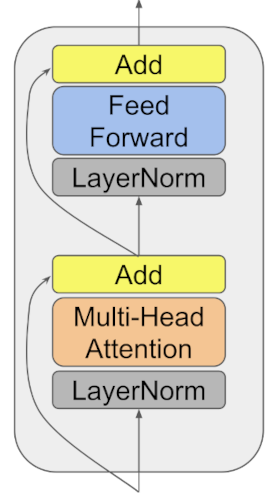

In [ ]:
class ViTBlock(torch.nn.Module):
    """
    Given x of shape [BATCH, S, d_model]
    performs multi-head attention (encoder style) followed by ViTMLP.
    Uses residual connections for both attention and ViTMLP.
    Input to attention and ViTMLP is normalized using LayerNorm.
    """

    def __init__(
        self, d_model: int, d_hidden: int, num_heads: int, dropout: float = 0.2
    ):
        super().__init__()

        self.d_model = d_model

        # TODO {

        # }

    def forward(self, x):
        assert len(x.shape) == 3
        assert x.shape[-1] == self.d_model

        # TODO {

        # }

        assert len(x.shape) == 3
        assert x.shape[-1] == self.d_model
        return x

Finish the implementation of ViT according to docstrings.

In [ ]:
class ViT(torch.nn.Module):
    """
    Given a batch of images (each image of shape input_shape=(C, H, W))
    splits them into patches and embeds using ViTPatchEmbedder.
    Then it extends the resulting set of vectors associated with an image with an additional
    learnable vector (of length d_model) that will be later used for classification.
    Then it processes vectors created for an image using num_layers
    ViTBlocks. In the end, it uses a linear layer on the classification vector
    to classify the image into one of the num_classes (outputs just pre-softmax logits).
    """

    def __init__(
        self,
        input_shape: Tuple[int, int, int],
        patch_size: int,
        d_model: int,
        d_hidden: int,
        num_heads: int,
        num_layers: int,
        num_classes: int,
    ):
        super().__init__()

        # TODO {

        # }

    def forward(self, x):
        assert len(x.shape) == 4  # B, C, H, W

        # TODO {

        # }
        assert len(x.shape) == 2
        return x

## Training
Now let's train the model. You can experiment with the parameters here. However, do not expect very good results on such a small dataset. ViT shines when pre-trained on large image datasets.  
You should be able to get accuracy > 0.6 on the test set.

In [ ]:
vit = ViT(
    (3, IMAGE_HEIGHT, IMAGE_WIDTH),
    PATCH_SIZE,
    d_model=32,
    d_hidden=16,
    num_heads=4,
    num_layers=3,
    num_classes=NUM_CLASSES,
)

logits = vit(SAMPLE_IMGS)
assert logits.shape == (BATCH_SIZE, NUM_CLASSES)

In [ ]:
class PLViT(pl.LightningModule):
    def __init__(self, model: torch.nn.Module):
        super().__init__()

        self.model = model
        self.criterion = torch.nn.CrossEntropyLoss()

    def train_dataloader(self):
        return TRAIN_LOADER

    def val_dataloader(self):
        return TEST_LOADER

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self.model(x)
        loss = self.criterion(logits, y)
        choosen = torch.argmax(logits, dim=-1)
        acc = (choosen == y).type(torch.float32).mean()

        # on-line metrics
        self.log("train/loss", loss.detach())
        self.log("train/acc", acc.detach())

        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self.model(x)
        choosen = torch.argmax(logits, dim=-1)
        acc = (choosen == y).type(torch.float32).mean()

        self.log("test/acc", acc.detach(), on_epoch=True)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.model.parameters())
        return optimizer

In [ ]:
%load_ext tensorboard
!mkdir -p tb_logs

In [ ]:
%tensorboard --logdir tb_logs

In [ ]:
from pytorch_lightning.loggers import TensorBoardLogger

vit = ViT(
    (3, IMAGE_HEIGHT, IMAGE_WIDTH),
    PATCH_SIZE,
    d_model=128,
    d_hidden=32,
    num_heads=4,
    num_layers=4,
    num_classes=NUM_CLASSES,
)

plViT = PLViT(model=vit)

trainer = pl.Trainer(
    logger=TensorBoardLogger("tb_logs", name="my_model"),
    accelerator="gpu",
    max_epochs=10,
    check_val_every_n_epoch=1,
)

trainer.fit(plViT)